# question 1

In [124]:
# q1_a


<img src="WhatsApp Image 2023-09-07 at 23.15.15.jpeg"/>

#q1_b

In [123]:
#1.b
# recorded signal in imported
import numpy as np
import librosa
import matplotlib.pyplot as plt
wav_file_path = 'recording.wav'
audio_data, sample_rate = librosa.load(wav_file_path)

In [94]:

def calculate_short_time_energy(signal, frame_length, hop_length):
    energy = []

    for i in range(0, len(signal) - frame_length + 1, hop_length):
        frame = signal[i:i+frame_length]
        frame_energy = np.sum(frame ** 2)
        energy.append(frame_energy)

    return energy


In [95]:
audio_file = 'recording.wav'
signal, sr = librosa.load(audio_file, sr=None)

# Define frame length and hop length in samples (adjust as needed)
#window size is 20 ms fs=44000 so total 840 samples in 20 ms
frame_length = int(sr * 0.02) 
hop_length = int(sr * 0.01)     

energy = calculate_short_time_energy(signal, frame_length, hop_length)

# Create time axis array
num_frames = len(energy)
time_axis = np.linspace(0, len(signal) / sr, num_frames)


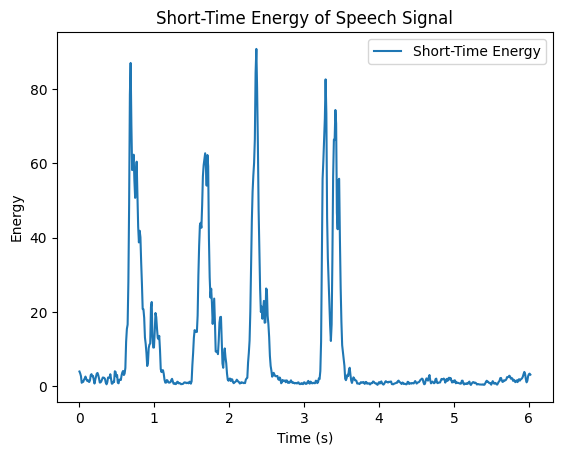

In [96]:
plt.plot(time_axis, energy, label='Short-Time Energy')
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.title('Short-Time Energy of Speech Signal')
plt.legend()
plt.show()

In [97]:
def ZCR(input_audio, frames, n_frames, Fs):
    # Mean justification
    for i in range(n_frames):
        frames[:, i] = frames[:, i] - np.mean(frames[:, i])
    
    # ZCR computation
    zcr = np.sum(np.logical_and(frames[:-1, :] * frames[1:, :] < 0, True), axis=0)
    
    # Plotting
    plt.figure()
    sampleTime = np.arange(1, len(input_audio) + 1) / Fs
    plt.subplot(2, 1, 1)
    plt.plot(sampleTime, input_audio)
    plt.ylabel('Amplitude')
    plt.title('Audio input')
    
    plt.subplot(2, 1, 2)
    plt.plot(zcr, '.-')
    plt.xlabel('sample')
    plt.ylabel('Count')
    plt.title('ZCR')
    
    plt.tight_layout()
    plt.show()



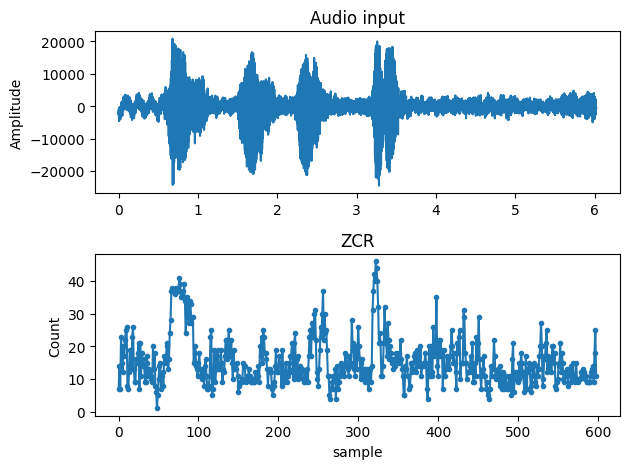

In [98]:
input_audio = 'recording.wav'
y, Fs = librosa.load(input_audio)
y = y * (2 ** 15)  # Convert to integer representation

n_samples = len(y)

frame_length = int(Fs * 0.02)  # 20 ms 
overlap = int(Fs * 0.01)       #10 ms 50% overlap
n_frames = (n_samples - overlap) // (frame_length - overlap)

frames = np.zeros((frame_length, n_frames))
for i in range(n_frames):
    start = i * (frame_length - overlap)
    end = start + frame_length
    frames[:, i] = y[start:end]

ZCR(y, frames, n_frames, Fs)





In [125]:
#1_c

In [121]:


y, Fs = librosa.load(input_audio)
y = y * (2 ** 15)  # Convert to integer representation

n_samples = len(y)
# Manually marked phoneme segments (replace with your data)
import numpy as np




# Manually marked phoneme segments (replace with your data)
phoneme_segments = [(0.1, 0.3,0), (0.4, 0.7, 1), (1.0,1.1,0),(1.1,1.3,1),(1.4,1.45,0),(1.8,2.1,1),(2.1,2.2,0),(2.7,2.8,1),(2.8,3,1)]

# Initialize lists to store average values
energy_vowels = []
zcr_vowels = []
energy_non_vowels = []
zcr_non_vowels = []

# Iterate through the segments
for start, end, is_vowel in phoneme_segments:
    # Convert start and end times to sample indices
    start_sample = int(start * Fs)
    end_sample = int(end * Fs)
    
    # Extract the segment from the audio signal
    segment = y[start_sample:end_sample]
    
    # Calculate short-time energy and ZCR for the segment
    segment_energy =  np.sum(np.square(segment))
    segment_zcr = librosa.feature.zero_crossing_rate(segment)
    
    # Append to the appropriate list based on vowel/non-vowel
    if is_vowel:
        energy_vowels.append(np.mean(segment_energy))
        zcr_vowels.append(np.mean(segment_zcr))
    else:
        energy_non_vowels.append(np.mean(segment_energy))
        zcr_non_vowels.append(np.mean(segment_zcr))

# Calculate average energy and ZCR for vowels and non-vowels
average_energy_vowels = np.mean(energy_vowels)
average_zcr_vowels = np.mean(zcr_vowels)
average_energy_non_vowels = np.mean(energy_non_vowels)
average_zcr_non_vowels = np.mean(energy_vowels)

# Perform statistical tests to compare the averages
# (e.g., t-tests, ANOVA, depending on your data and hypothesis)

# Print or visualize the results
print("Average Energy (Vowels):", average_energy_vowels)
print("Average ZCR (Vowels):", average_zcr_vowels)
print("Average Energy (Non-Vowels):", average_energy_non_vowels)
print("Average ZCR (Non-Vowels):", average_zcr_non_vowels)


Average Energy (Vowels): 35386843000.0
Average ZCR (Vowels): 0.025199485844017093
Average Energy (Non-Vowels): 12484497000.0
Average ZCR (Non-Vowels): 35386843000.0


# Observation: average zcr of vowel phonemes are much much lesser than zcr of average consonent phonemes zcr
# average energy of vowels phonemes is higher than consonent phoemes
    

#Q_3_a

In [105]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Define the signal parameters
sample_rate = 100  # Sampling rate in Hz
duration = 1.0  # Duration of the signal in seconds
# t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# # Create the signal with the transition from 100 Hz to 200 Hz at 0.5 seconds
# frequency = np.where(t < 0.5, 100, 200)
# signal_waveform = np.sin(2 * np.pi * frequency * t)
t = np.linspace(0, 1, 1000)  # 1 second signal sampled at 1000 Hz
tau=0.5
f1=100
f2=200
signal = np.piecewise(t, [t <= tau, t > tau], [lambda t: np.sin(2 * np.pi * f1 * t), lambda t: np.sin(2 * np.pi * f2 * (t - tau))])

# Generate the spectrogram
frequencies, times, Sxx = spectrogram(signal, fs=1000, nperseg=20,noverlap=10)





No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


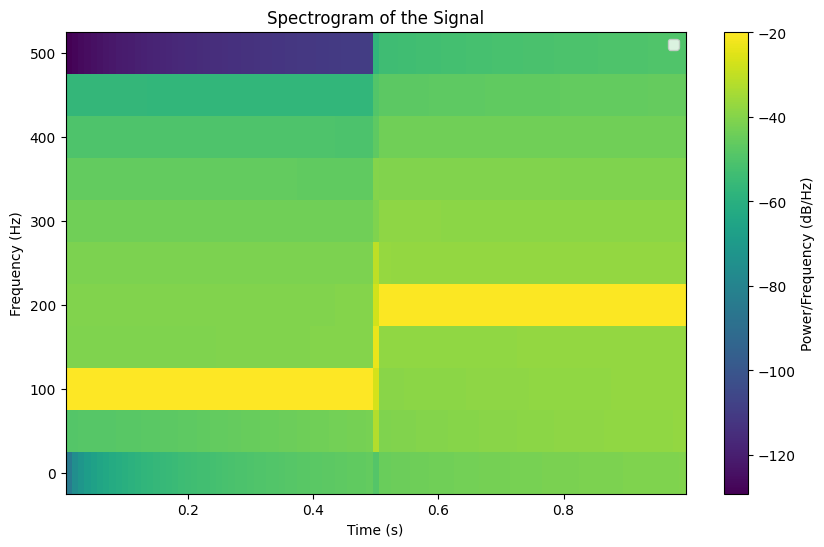

In [100]:
# Visualize the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx))
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of the Signal')
# plt.axvline(x=0.5, color='red', linestyle='--', label='Transition Time (0.5s)')
plt.legend()
plt.show()





#  From the plot we can observe that the transition of frequency from 100 to 200 Hz is taking place around the mid of the time interval 0.4 and 0.6
# empericall finding of tau(0.5s) is matching with the tau given in the question defintion

In [127]:
#Q3_b

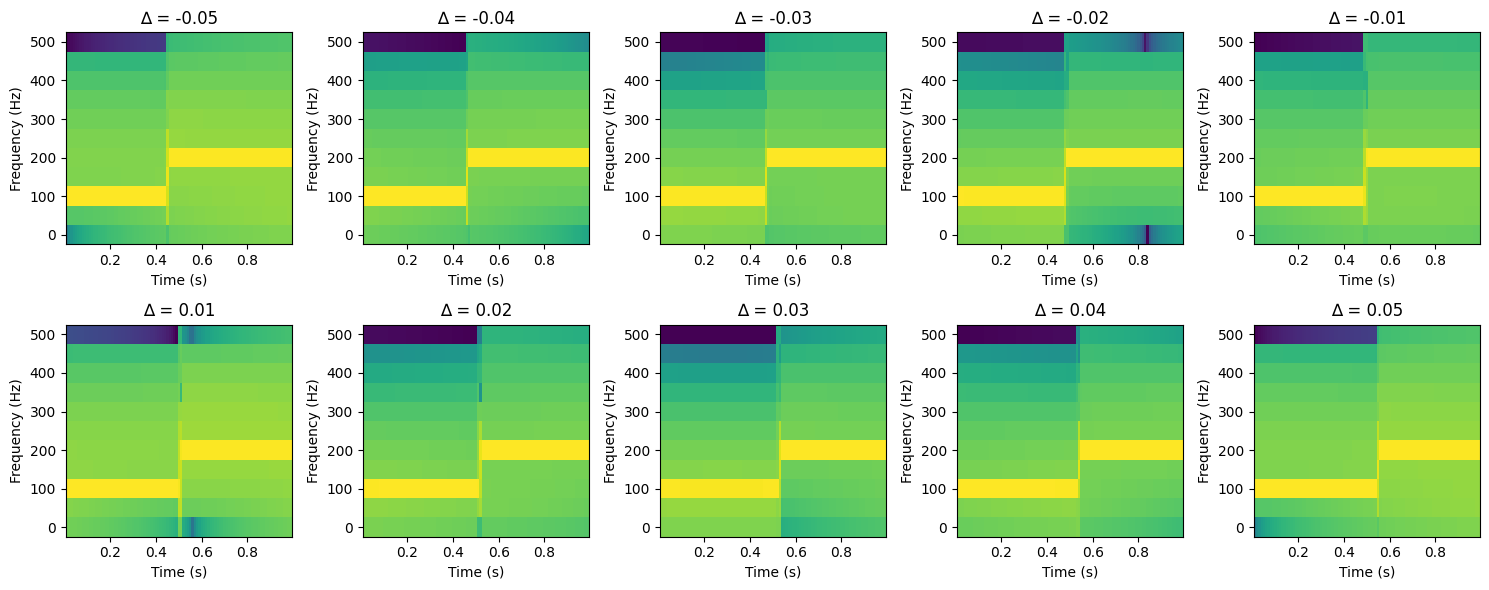

In [101]:
delta_range = np.linspace(-0.05, 0.05, 10)  # Adjust the range and granularity as needed

# Create a grid of subplots
num_rows = 2  # You can adjust the number of rows and columns as needed
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6))

# Iterate through the ∆ values
for i, delta in enumerate(delta_range):
    # Create a perturbed signal by shifting it by delta
    perturbed_signal = np.piecewise(t, [t <= tau + delta, t > tau + delta], [lambda t: np.sin(2 * np.pi * f1 * (t - delta)), lambda t: np.sin(2 * np.pi * f2 * (t - tau - delta))])

    # Compute the STFT of the perturbed signal
    perturbed_frequencies,perturbed_times, perturbed_Sxx = spectrogram(perturbed_signal, fs=1000, nperseg=20,noverlap=)

    # Plot the spectrogram in the corresponding subplot
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    ax.pcolormesh(perturbed_times, perturbed_frequencies, 10 * np.log10(perturbed_Sxx))
    ax.set_title(f'∆ = {delta:.2f}')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Frequency (Hz)')

# Adjust layout and spacing
plt.tight_layout()
plt.show()


##  From the plot we can see maximum delta is 0.02 second  which results the same τ from the above computation with 20ms window size.
# increasing more than 0.2 leading to the tau increasing the distance from 0.5s(emperically found)

3Q_3_c

/tmp/ipykernel_4886/3556521847.py:34: RuntimeWarning: divide by zero encountered in log10
  ax.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto')


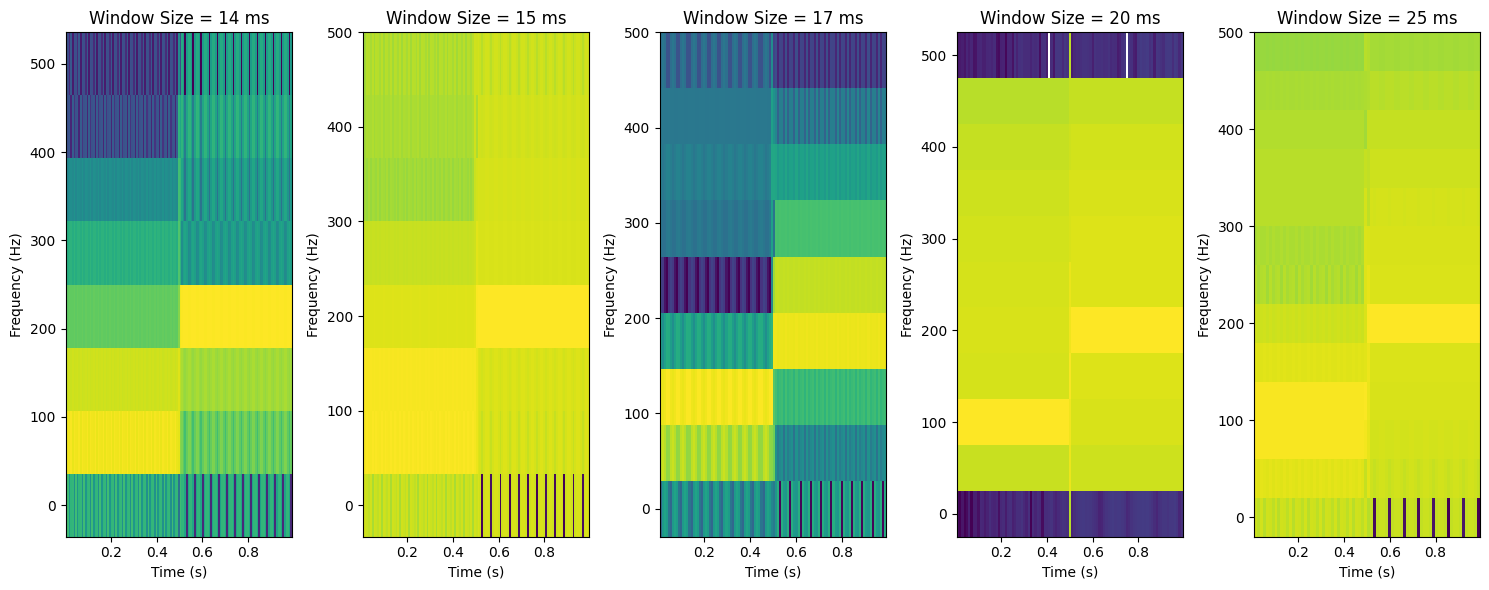

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Define signal parameters
sample_rate = 1000
duration = 1.0
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
f1 = 100
f2 = 200
tau = 0.5

# Define a range of window sizes to test
window_sizes = [14,15,17,20,25]  # Adjust the window sizes as needed


# Create a grid of subplots
num_rows = 1
num_cols = len(window_sizes)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6))

# Iterate through the window sizes
for i, window_size in enumerate(window_sizes):
    # Compute the STFT for the current window size
    frequencies, times, Sxx = spectrogram(
        np.piecewise(t, [t <= tau, t > tau], [lambda t: np.sin(2 * np.pi * f1 * t), lambda t: np.sin(2 * np.pi * f2 * (t - tau))]),
        fs=sample_rate,
        nperseg=window_size,
        noverlap=window_size // 2  # Adjust overlap as needed
    )

    # Plot the spectrogram in the corresponding subplot
    ax = axes[i]
    ax.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto')
    ax.set_title(f'Window Size = {window_size} ms')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Frequency (Hz)')

# Adjust layout and spacing
plt.tight_layout()
plt.show()


# so as we increasing the window size frequency resolution in increasing at the same time , time resolution is decresing . From the plot we can ovserve that the 
# 15 ms is minimum require to detect the different frequencies.
# The window size is dependent on the freuqency component of the signals. if the the differences of frequencies are large then we can use smaller window size and vice versa